## Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('../Data/Banking_CreditCardAttrition.csv', sep=';')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,253,196,196,262,0,7,9,12,7,7
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,242,323,222,238,0,1,6,11,7,8
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,330,967,213,182,0,1,5,5,4,5
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,166,184,285,215,0,4,2,5,2,7
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,149,192,88,279,0,1,7,9,5,6


## Data Visualization and Preprocessing

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int64
Customer_Age                10113 non-null float64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10123 non-null float64
Total_Revolving_Bal         10127 non-null int64
Trans_Amt_Oct12             10127 non-null int64
Trans_Amt_Nov12             10127 non-null int64
Trans_Amt_Dec12             10127 non-null int64


In [ ]:
print(sum(data.duplicated()))

0


In [ ]:
data.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
count,1.012700e+04,10127.000000,10113.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10123.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.326412,2.346203,35.928409,3.812580,2.341167,2.455317,9404.071817,1194.058951,...,861.019749,672.763405,609.424015,605.489582,12.713341,12.307100,13.104967,10.209835,7.354597,9.168856
std,3.690378e+07,0.367235,8.022353,1.298908,7.986416,1.554408,1.010622,1.106225,12283.599656,1073.368778,...,696.774222,592.881189,498.088308,489.841852,4.881924,5.540818,5.682993,3.892556,3.981386,4.477821
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,398.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,...,419.000000,309.000000,275.000000,272.000000,9.000000,9.000000,9.000000,8.000000,4.000000,6.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,...,729.000000,516.000000,498.000000,514.000000,13.000000,13.000000,13.000000,10.000000,8.000000,10.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11072.500000,1784.000000,...,974.000000,764.000000,731.000000,706.000000,16.000000,16.000000,17.000000,13.000000,10.000000,12.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,180000.000000,40345.000000,...,4562.000000,3885.000000,3185.000000,3141.000000,31.000000,32.000000,34.000000,24.000000,21.000000,25.000000


In [ ]:
data.isnull().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                14
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 4
Total_Revolving_Bal          0
Trans_Amt_Oct12              0
Trans_Amt_Nov12              0
Trans_Amt_Dec12              0
Trans_Amt_Jan13              0
Trans_Amt_Feb13              0
Trans_Amt_Mar13              0
Trans_Count_Oct12            0
Trans_Count_Nov12            0
Trans_Count_Dec12            0
Trans_Count_Jan13            0
Trans_Count_Feb13            0
Trans_Count_Mar13            0
dtype: int64

In [ ]:
data['Customer_Age'].describe()

count    10113.000000
mean        46.326412
std          8.022353
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [ ]:
data['Credit_Limit'].describe()

count     10123.000000
mean       9404.071817
std       12283.599656
min         398.000000
25%        2555.000000
50%        4549.000000
75%       11072.500000
max      180000.000000
Name: Credit_Limit, dtype: float64

In [ ]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

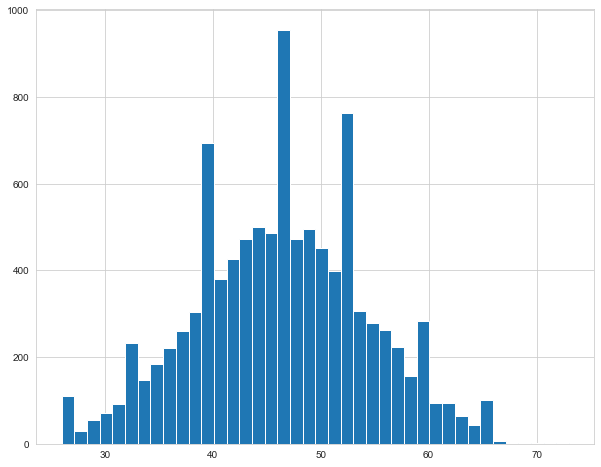

In [ ]:
sns.set_style("whitegrid")
data['Customer_Age'].hist(bins=40, figsize=(10, 8))

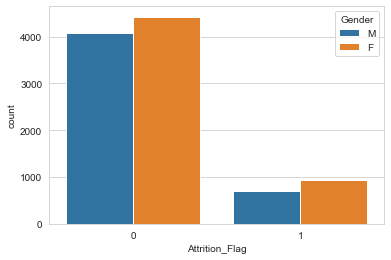

In [ ]:
sns.countplot(x='Attrition_Flag', data=data, hue='Gender')

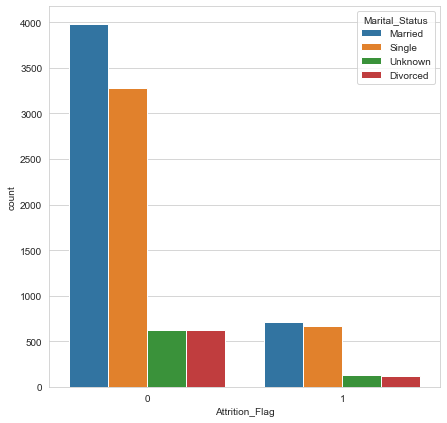

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Attrition_Flag', data=data, hue='Marital_Status')

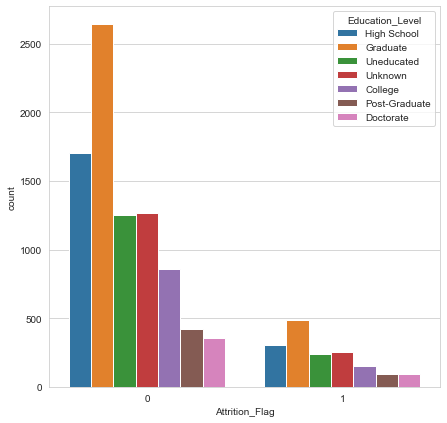

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Attrition_Flag', data=data, hue='Education_Level')

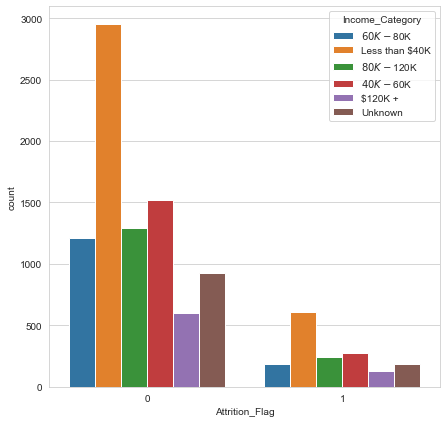

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Attrition_Flag', data=data, hue='Income_Category')

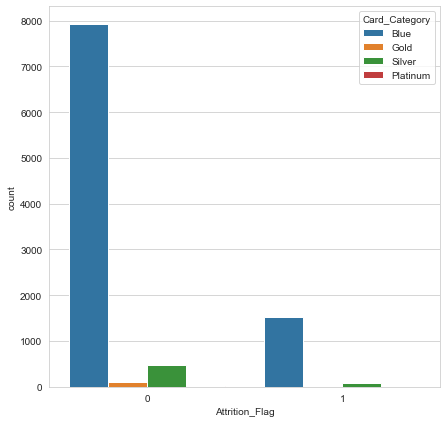

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot(x='Attrition_Flag', data=data, hue='Card_Category')

In [ ]:
data.corr()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
CLIENTNUM,1.000000,-0.046430,0.007607,0.006772,0.134588,0.006907,0.005729,0.005694,0.003403,-0.009243,...,-0.015035,-0.012532,-0.021076,-0.019935,0.007063,-0.013575,-0.004423,0.006673,-0.005095,-0.002082
Attrition_Flag,-0.046430,1.000000,0.018196,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.014427,-0.154254,...,-0.160748,-0.157351,-0.159822,-0.165827,-0.424788,-0.167133,-0.188274,-0.427733,-0.354261,-0.351187
Customer_Age,0.007607,0.018196,1.000000,-0.122316,0.789262,-0.010930,0.054386,-0.018520,0.005686,0.007531,...,-0.037222,-0.046697,-0.031101,-0.078146,-0.063157,-0.048622,-0.041769,-0.075329,-0.029838,-0.077945
Dependent_count,0.006772,0.018991,-0.122316,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.069173,0.002305,...,0.026946,0.020637,0.019401,0.018160,0.028594,0.033623,0.057514,0.030593,0.040824,0.052975
Months_on_book,0.134588,0.013687,0.789262,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.008358,-0.000543,...,-0.031576,-0.036569,-0.027158,-0.064836,-0.042005,-0.036549,-0.032827,-0.056011,-0.022890,-0.059423
Total_Relationship_Count,0.006907,-0.150005,-0.010930,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.074104,0.005827,...,-0.331828,-0.328147,-0.318701,-0.321332,-0.164145,-0.231930,-0.230249,-0.170981,-0.198127,-0.185023
Months_Inactive_12_mon,0.005729,0.152449,0.054386,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.017027,-0.039292,...,-0.036998,-0.034671,-0.036391,-0.033382,-0.051734,-0.021270,-0.013492,-0.057010,-0.045188,-0.034707
Contacts_Count_12_mon,0.005694,0.204491,-0.018520,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.014724,-0.034732,...,-0.107435,-0.101054,-0.104671,-0.106671,-0.114550,-0.106564,-0.104275,-0.146860,-0.151689,-0.146267
Credit_Limit,0.003403,-0.014427,0.005686,0.069173,0.008358,-0.074104,-0.017027,0.014724,1.000000,0.031145,...,0.168167,0.164946,0.166333,0.154036,0.054004,0.078087,0.094563,0.069216,0.061046,0.056469
Total_Revolving_Bal,-0.009243,-0.154254,0.007531,0.002305,-0.000543,0.005827,-0.039292,-0.034732,0.031145,1.000000,...,0.030612,0.041369,0.040637,0.037462,0.033130,-0.009153,-0.006875,0.057404,0.028294,0.013473


In [ ]:
plt.figure(figsize=(2, 2))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Trans_Amt_Oct12,Trans_Amt_Nov12,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
CLIENTNUM,1,-0.046,0.0076,0.0068,0.13,0.0069,0.0057,0.0057,0.0034,-0.0092,-0.021,-0.024,-0.015,-0.013,-0.021,-0.02,0.0071,-0.014,-0.0044,0.0067,-0.0051,-0.0021
Attrition_Flag,-0.046,1,0.018,0.019,0.014,-0.15,0.15,0.2,-0.014,-0.15,-0.17,-0.15,-0.16,-0.16,-0.16,-0.17,-0.42,-0.17,-0.19,-0.43,-0.35,-0.35
Customer_Age,0.0076,0.018,1,-0.12,0.79,-0.011,0.054,-0.019,0.0057,0.0075,-0.033,-0.045,-0.037,-0.047,-0.031,-0.078,-0.063,-0.049,-0.042,-0.075,-0.03,-0.078
Dependent_count,0.0068,0.019,-0.12,1,-0.1,-0.039,-0.011,-0.041,0.069,0.0023,0.027,0.028,0.027,0.021,0.019,0.018,0.029,0.034,0.058,0.031,0.041,0.053
Months_on_book,0.13,0.014,0.79,-0.1,1,-0.0092,0.074,-0.011,0.0084,-0.00054,-0.029,-0.036,-0.032,-0.037,-0.027,-0.065,-0.042,-0.037,-0.033,-0.056,-0.023,-0.059
Total_Relationship_Count,0.0069,-0.15,-0.011,-0.039,-0.0092,1,-0.0037,0.055,-0.074,0.0058,-0.35,-0.33,-0.33,-0.33,-0.32,-0.32,-0.16,-0.23,-0.23,-0.17,-0.2,-0.19
Months_Inactive_12_mon,0.0057,0.15,0.054,-0.011,0.074,-0.0037,1,0.029,-0.017,-0.039,-0.034,-0.035,-0.037,-0.035,-0.036,-0.033,-0.052,-0.021,-0.013,-0.057,-0.045,-0.035
Contacts_Count_12_mon,0.0057,0.2,-0.019,-0.041,-0.011,0.055,0.029,1,0.015,-0.035,-0.11,-0.11,-0.11,-0.1,-0.1,-0.11,-0.11,-0.11,-0.1,-0.15,-0.15,-0.15
Credit_Limit,0.0034,-0.014,0.0057,0.069,0.0084,-0.074,-0.017,0.015,1,0.031,0.16,0.16,0.17,0.16,0.17,0.15,0.054,0.078,0.095,0.069,0.061,0.056
Total_Revolving_Bal,-0.0092,-0.15,0.0075,0.0023,-0.00054,0.0058,-0.039,-0.035,0.031,1,0.038,0.033,0.031,0.041,0.041,0.037,0.033,-0.0092,-0.0069,0.057,0.028,0.013


<Figure size 144x144 with 0 Axes>

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

Customer_Age_outlier = outliers_iqr(data['Customer_Age'])
Customer_Age_outlier = Customer_Age_outlier[0]

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [ ]:
Dependent_count_outlier = outliers_iqr(data['Dependent_count'])
Dependent_count_outlier = Dependent_count_outlier[0]
Dependent_count_outlier

array([], dtype=int64)

In [ ]:
Months_on_book_outlier = outliers_iqr(data['Months_on_book'])
Months_on_book_outlier = Months_on_book_outlier[0]
Months_on_book_outlier.shape

(386,)

In [ ]:
Total_Relationship_Count_outlier = outliers_iqr(data['Total_Relationship_Count'])
Total_Relationship_Count_outlier = Total_Relationship_Count_outlier[0]
Total_Relationship_Count_outlier.shape

(0,)

In [ ]:
Months_Inactive_12_mon_outlier = outliers_iqr(data['Months_Inactive_12_mon'])
Months_Inactive_12_mon_outlier = Months_Inactive_12_mon_outlier[0]
Months_Inactive_12_mon_outlier.shape

(331,)

In [ ]:
Contacts_Count_12_mon_outlier = outliers_iqr(data['Contacts_Count_12_mon'])
Contacts_Count_12_mon_outlier = Contacts_Count_12_mon_outlier[0]
Contacts_Count_12_mon_outlier.shape

(629,)

In [ ]:
Credit_Limit_outlier = outliers_iqr(data['Credit_Limit'])
Credit_Limit_outlier = Credit_Limit_outlier[0]
Credit_Limit_outlier.shape

(0,)

In [ ]:
Total_Revolving_Bal_outlier = outliers_iqr(data['Total_Revolving_Bal'])
Total_Revolving_Bal_outlier = Total_Revolving_Bal_outlier[0]
Total_Revolving_Bal_outlier.shape

(16,)

In [ ]:
Total_Revolving_Bal_outlier

array([ 1044,  1721,  2739,  5018,  5391,  6396,  6717,  7461,  8676,
        9415,  9464,  9513,  9754,  9797,  9869, 10051], dtype=int64)

In [ ]:
Total_Revolving_Bal_outlier

array([ 1044,  1721,  2739,  5018,  5391,  6396,  6717,  7461,  8676,
        9415,  9464,  9513,  9754,  9797,  9869, 10051], dtype=int64)

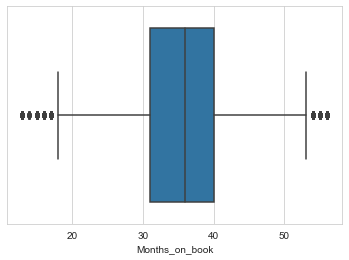

In [ ]:
sns.boxplot(data['Months_on_book'])

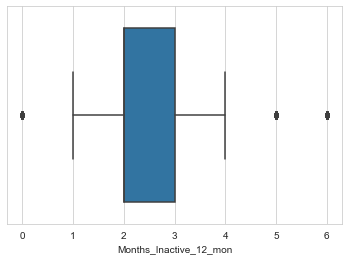

In [ ]:
sns.boxplot(data['Months_Inactive_12_mon'])

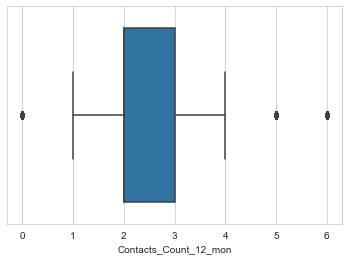

In [ ]:
sns.boxplot(data['Contacts_Count_12_mon'])

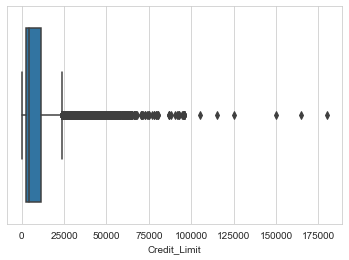

In [ ]:
sns.boxplot(data['Credit_Limit'])

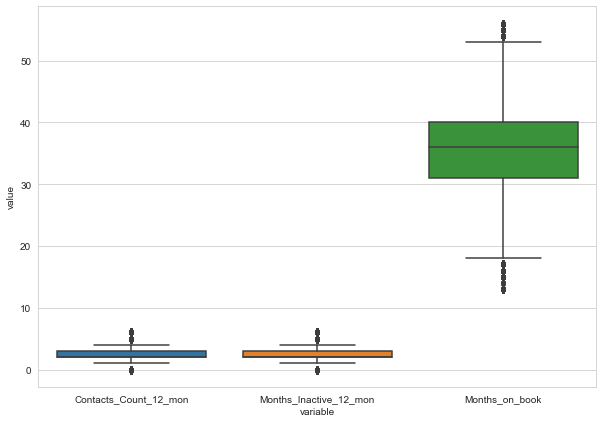

In [ ]:
plt.figure(figsize =(10, 7))
columns = ['Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Months_on_book']
df = pd.DataFrame(data = data, columns = columns)
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [ ]:
floor = data["Customer_Age"].quantile(0.05)
cap = data["Customer_Age"].quantile(0.99)
print(floor)
print(cap)

33.0
65.0


In [ ]:
data['Customer_Age'].fillna(46.32, inplace=True)
data['Credit_Limit'].fillna(9404.8, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int64
Customer_Age                10127 non-null float64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Trans_Amt_Oct12             10127 non-null int64
Trans_Amt_Nov12             10127 non-null int64
Trans_Amt_Dec12             10127 non-null int64


In [ ]:
gender_dm = pd.get_dummies(data['Gender'], drop_first=True)
gender_dm.columns = ['Male']
gender_dm.head()

,Male
0,1
1,0
2,1
3,0
4,1


In [ ]:
Education_Level_dm = pd.get_dummies(data['Education_Level'], drop_first=True)
Education_Level_dm.head()

,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [ ]:
Marital_Status_dm = pd.get_dummies(data['Marital_Status'], drop_first=True)
Marital_Status_dm.head()

,Married,Single,Unknown
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


In [ ]:
Income_Category_dm = pd.get_dummies(data['Income_Category'], drop_first=True)
Income_Category_dm.head()

,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [ ]:
Card_Category_dm = pd.get_dummies(data['Card_Category'], drop_first=True)
Card_Category_dm.head()

,Gold,Platinum,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
new_data = pd.concat([data, gender_dm, Education_Level_dm, Card_Category_dm, Income_Category_dm, Marital_Status_dm], axis=1)
new_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Platinum,Silver,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Married,Single,Unknown
0,768805383,0,45.0,M,3,High School,Married,$60K - $80K,Blue,39,...,0,0,0,1,0,0,0,1,0,0
1,818770008,0,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,0,0,0,0,1,0,0,1,0
2,713982108,0,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0,0,0,1,0,0,1,0,0
3,769911858,0,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0,0,0,1,0,0,0,1
4,709106358,0,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
new_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Trans_Amt_Oct12', 'Trans_Amt_Nov12', 'Trans_Amt_Dec12',
       'Trans_Amt_Jan13', 'Trans_Amt_Feb13', 'Trans_Amt_Mar13',
       'Trans_Count_Oct12', 'Trans_Count_Nov12', 'Trans_Count_Dec12',
       'Trans_Count_Jan13', 'Trans_Count_Feb13', 'Trans_Count_Mar13', 'Male',
       'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated',
       'Unknown', 'Gold', 'Platinum', 'Silver', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', 'Less than $40K', 'Unknown', 'Married', 'Single',
       'Unknown'],
      dtype='object')

In [ ]:
new_data.drop(['CLIENTNUM', 'Education_Level', 'Marital_Status', 'Card_Category', 'Gender', 'Income_Category'], inplace=True, axis=1)
new_data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Trans_Amt_Oct12,...,Platinum,Silver,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Married,Single,Unknown
0,0,45.0,3,39,5,1,3,12691.0,777,0,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,5,44,6,1,2,8256.0,864,0,...,0,0,0,0,0,1,0,0,1,0
2,0,51.0,3,36,4,1,0,3418.0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,40.0,4,34,3,4,1,3313.0,2661,0,...,0,0,0,0,0,1,0,0,0,1
4,0,40.0,3,21,5,1,0,4716.0,0,0,...,0,0,0,1,0,0,0,1,0,0


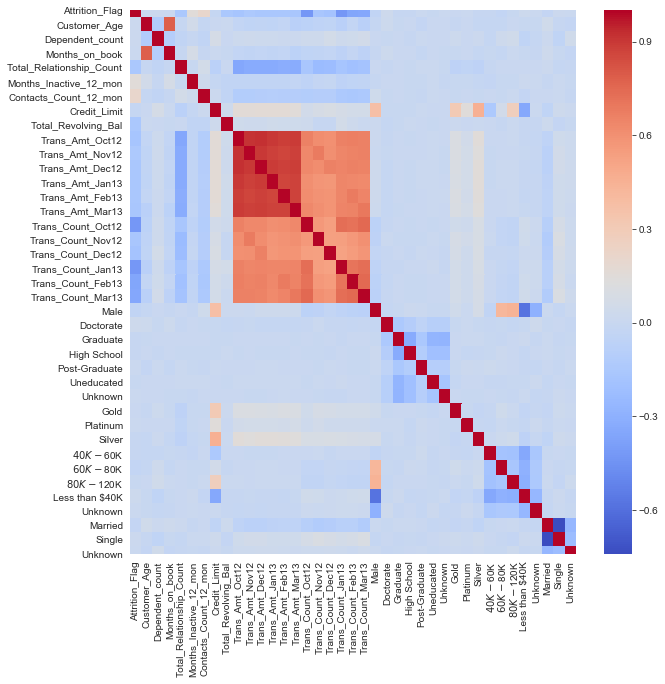

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(new_data.corr(), cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
ck = add_constant(new_data)
pd.Series([variance_inflation_factor(ck.values, i) 
               for i in range(ck.shape[1])], 
              index=ck.columns)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                       150.805465
Attrition_Flag                1.588445
Customer_Age                  2.706310
Dependent_count               1.049430
Months_on_book                2.660838
Total_Relationship_Count      1.217256
Months_Inactive_12_mon        1.034300
Contacts_Count_12_mon         1.069040
Credit_Limit                  2.472137
Total_Revolving_Bal           1.036536
Trans_Amt_Oct12              10.839565
Trans_Amt_Nov12               8.915360
Trans_Amt_Dec12               9.776442
Trans_Amt_Jan13               7.163815
Trans_Amt_Feb13               6.424325
Trans_Amt_Mar13               7.379921
Trans_Count_Oct12             3.205306
Trans_Count_Nov12             2.138617
Trans_Count_Dec12             2.007921
Trans_Count_Jan13             3.065956
Trans_Count_Feb13             3.119076
Trans_Count_Mar13             3.617326
Male                          3.494501
Doctorate                     1.387195
Graduate                      2.833435
High School              

## Training and Evaluation

### Logistic Regression Classifier

In [ ]:
X = new_data.drop('Attrition_Flag', axis=1)
# X = new_data[columns]
y = new_data['Attrition_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7595, 38) (2532, 38) (7595,) (2532,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = lr.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2124
           1       0.78      0.64      0.70       408

    accuracy                           0.91      2532
   macro avg       0.86      0.80      0.83      2532
weighted avg       0.91      0.91      0.91      2532



In [ ]:
print(confusion_matrix(y_test, preds))

[[2050   74]
 [ 146  262]]


In [ ]:
X_test_probability = lr.predict_proba(X_test)
X_test_probability[:10]

array([[0.92562863, 0.07437137],
       [0.99735671, 0.00264329],
       [0.9762162 , 0.0237838 ],
       [0.8286712 , 0.1713288 ],
       [0.99361037, 0.00638963],
       [0.12619619, 0.87380381],
       [0.96765732, 0.03234268],
       [0.83635191, 0.16364809],
       [0.98272956, 0.01727044],
       [0.99067935, 0.00932065]])

In [ ]:
X_test_probability[:100].round(2)

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.83, 0.17],
       [0.99, 0.01],
       [0.13, 0.87],
       [0.97, 0.03],
       [0.84, 0.16],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.32, 0.68],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.77, 0.23],
       [0.71, 0.29],
       [0.79, 0.21],
       [0.54, 0.46],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.83, 0.17],
       [0.2 , 0.8 ],
       [0.66, 0.34],
       [0.99, 0.01],
       [0.79, 0.21],
       [1.  , 0.  ],
       [0.59, 0.41],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.81, 0.19],
       [0.18, 0.82],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.97,